# Micro-Credit Defaulter Project

In [83]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns
from scipy.stats import boxcox,zscore
from numpy import log,sqrt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix,accuracy_score, classification_report,f1_score
import statsmodels.stats.proportion as smpt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
#storing the .csv file
data = 'Data file.csv'

In [4]:
#loading the dataset from csv file using read csv method
df=read_csv(data)
df=pd.DataFrame(df)
df

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       2016-07-20  
1       2016-08-10  
2       2016-08-19  
3       2016-06-06  
4       2016-06-22  
...            ...  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[209593 rows x 37 columns]

In [5]:
#This is very essential to make a copy of 1 or 2 to not to lose the valuable data by mistake 
df1=df.copy()

In [6]:
df1

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       2016-07-20  
1       2016-08-10  
2       2016-08-19  
3       2016-06-06  
4       2016-06-22  
...            ...  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[209593 rows x 37 columns]

# EDA | Exploratory Data Analysis

    1. Data Inspection

    2. Data Visualization
    
    3. Data Cleaning

# Data Inspection

In [7]:
df1.shape

(209593, 37)

In [8]:
df1.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [9]:
df1.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [10]:
df1.info

<bound method DataFrame.info of         Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  las

In [11]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [12]:
df1['pcircle'].unique()

array(['UPW'], dtype=object)

In [13]:
#By observing the dataset these 4 columns wont be needed for any further analysis so i'll be dropping them
df1.drop('pcircle',axis=1,inplace=True)
df1.drop('pdate',axis=1,inplace=True)
df1.drop('Unnamed: 0',axis=1,inplace=True)
df1.drop('msisdn',axis=1,inplace=True)

In [14]:
df1

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0       ...            2            12              6.0                 0.0   
1       ...            1            12             12.0                 0.0   
2       ...            1             6              6.0                 0.0   
3       ...            2            12              6.0                 0.0   
4       ...            7            42              6.0                 0.0   
...     ...          ...           ...              ...                 ...   
209588  ...            2            12              6.0                 0.0   
209589  ...            3            18              6.0                 0.0   
209590  ...            4            42             12.0                 0.0   
209591  ...            2            18             12.0                 0.0   
209592  ...            2            18             12.0                 0.0   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0               2.0            12                6                 0.0   
1               1.0            12               12                 0.0   
2               1.0             6                6                 0.0   
3               2.0            12                6                 0.0   
4               7.0            42                6                 0.0   
...             ...           ...              ...                 ...   
209588          2.0            12                6                 0.0   
209589          3.0            18                6                 0.0   
209590          6.0            54               12                 0.0   
209591          3.0            24               12                 0.0   
209592          2.0            18               12                 0.0   

        payback30  payback90  
0       29.000000  29.000000  
1        0.000000   0.000000  
2        0.000000   0.000000  
3        0.000000   0.000000  
4        2.333333   2.333333  
...           ...        ...  
209588   1.000000   1.000000  
209589   1.000000   1.000000  
209590   4.000000   3.833333  
209591   0

# Data Visualiztion

In [15]:
df1

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0       ...            2            12              6.0                 0.0   
1       ...            1            12             12.0                 0.0   
2       ...            1             6              6.0                 0.0   
3       ...            2            12              6.0                 0.0   
4       ...            7            42              6.0                 0.0   
...     ...          ...           ...              ...                 ...   
209588  ...            2            12              6.0                 0.0   
209589  ...            3            18              6.0                 0.0   
209590  ...            4            42             12.0                 0.0   
209591  ...            2            18             12.0                 0.0   
209592  ...            2            18             12.0                 0.0   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0               2.0            12                6                 0.0   
1               1.0            12               12                 0.0   
2               1.0             6                6                 0.0   
3               2.0            12                6                 0.0   
4               7.0            42                6                 0.0   
...             ...           ...              ...                 ...   
209588          2.0            12                6                 0.0   
209589          3.0            18                6                 0.0   
209590          6.0            54               12                 0.0   
209591          3.0            24               12                 0.0   
209592          2.0            18               12                 0.0   

        payback30  payback90  
0       29.000000  29.000000  
1        0.000000   0.000000  
2        0.000000   0.000000  
3        0.000000   0.000000  
4        2.333333   2.333333  
...           ...        ...  
209588   1.000000   1.000000  
209589   1.000000   1.000000  
209590   4.000000   3.833333  
209591   0

In [16]:
df1.iloc[:,1:16]

aon  daily_decr30  daily_decr90  rental30  rental90  \
0        272.0   3055.050000   3065.150000    220.13    260.13   
1        712.0  12122.000000  12124.750000   3691.26   3691.26   
2        535.0   1398.000000   1398.000000    900.13    900.13   
3        241.0     21.228000     21.228000    159.42    159.42   
4        947.0    150.619333    150.619333   1098.90   1098.90   
...        ...           ...           ...       ...       ...   
209588   404.0    151.872333    151.872333   1089.19   1089.19   
209589  1075.0     36.936000     36.936000   1728.36   1728.36   
209590  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591  1732.0  12488.228333  12574.370000    411.83    984.58   
209592  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0               21.0             3078.0                1539.0   
1                0.0             5787.0                5787.0   
2                0.0             1539.0                1539.0   
3                0.0                0.0                   0.0   
4                2.0            20029.0                2309.0   
...              ...                ...                   ...   
209588           2.0            10404.0                3178.0   
209589           1.0             3092.0                 773.0   
209590           8.0             9334.0                1539.0   
209591           4.0            12154.0                 773.0   
209592           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  
0                       7.50              2            21  
1                      61.04              1             0  
2                      66.32              1             0  
3                       0.00              1             0  
4                      29.00              8             2  
...                      ...            ...           ...  
209588                 91.81              3             2  
209589                161.30              6             2  
209590                 51.13             11             5  
209591                164.00              6             4  
209592                356.70              3            19  

[209593 rows x 15 columns]

In [17]:
df1.iloc[:,16:33]

sumamnt_ma_rech90  medianamnt_ma_rech90  medianmarechprebal90  \
0                    3078                1539.0                  7.50   
1                    5787                5787.0                 61.04   
2                    1539                1539.0                 66.32   
3                     947                 947.0                  2.50   
4                   23496                2888.0                 35.00   
...                   ...                   ...                   ...   
209588              10404                3178.0                 91.81   
209589               4038                 773.0                111.80   
209590              18592                1539.0                 47.13   
209591              17941                2410.5                100.00   
209592              16591                7526.0                392.20   

        cnt_da_rech30  fr_da_rech30  cnt_da_rech90  fr_da_rech90  cnt_loans30  \
0                 0.0           0.0              0             0            2   
1                 0.0           0.0              0             0            1   
2                 0.0           0.0              0             0            1   
3                 0.0           0.0              0             0            2   
4                 0.0           0.0              0             0            7   
...               ...           ...            ...           ...          ...   
209588            0.0           0.0              0             0            2   
209589            0.0           0.0              0             0            3   
209590            0.0           0.0              0             0            4   
209591            0.0           0.0              1             0            2   
209592            0.0           0.0              0             0            2   

        amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  \
0                 12              6.0                 0.0          2.0   
1                 12             12.0                 0.0          1.0   
2                  6              6.0                 0.0          1.0   
3                 12              6.0                 0.0          2.0   
4                 42              6.0                 0.0          7.0   
...              ...              ...                 ...          ...   
209588            12              6.0                 0.0          2.0   
209589            18              6.0                 0.0          3.0   
209590            42             12.0                 0.0          6.0   
209591            18             12.0                 0.0          3.0   
209592            18             12.0                 0.0          2.0   

        amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0                 12                6                 0.0  29.000000   
1                 12               12                 0.0   0.000000   
2                  6                6                 0.0   0.000000   
3                 12                6                 0.0   0.000000   
4                 42                6                 0.0   2.333333   
...              ...              ...                 ...        ...   
209588            12                6                 0.0   1.000000   
209589            18                6                 0.0   1.000000   
209590            54               12                 0.0   4.000000   
209591            24               12                 0.0   0.000000   
209592            18               12                 0.0   0.000000   

        payback90  
0       29.000000  
1        0.000000  
2        0.000000  
3        0.000000  
4        2.333333  
...           ...  
209588   1.000000  
209589   1.000000  
209590   3.833333  
209591  10.500000  
209592   0.000000  

[209593 rows x 17 columns]

In [18]:

df1.iloc[:,1:16].describe()

aon   daily_decr30   daily_decr90       rental30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean     8112.343445    5381.402289    6082.515068    2692.581910   
std     75696.082531    9220.623400   10918.812767    4308.586781   
min       -48.000000     -93.012667     -93.012667  -23737.140000   
25%       246.000000      42.440000      42.692000     280.420000   
50%       527.000000    1469.175667    1500.000000    1083.570000   
75%       982.000000    7244.000000    7802.790000    3356.940000   
max    999860.755168  265926.000000  320630.000000  198926.110000   

            rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
count  209593.000000      209593.000000      209593.000000     209593.000000   
mean     3483.406534        3755.847800        3712.202921       2064.452797   
std      5770.461279       53905.892230       53374.833430       2370.786034   
min    -24720.580000         -29.000000         -29.000000          0.000000   
25%       300.260000           1.000000           0.000000        770.000000   
50%      1334.000000           3.000000           0.000000       1539.000000   
75%      4201.790000           7.000000           0.000000       2309.000000   
max    200148.110000      998650.377733      999171.809410      55000.000000   

       cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
count  209593.000000  209593.000000      209593.000000         209593.000000   
mean        3.978057    3737.355121        7704.501157           1812.817952   
std         4.256090   53643.625172       10139.621714           2070.864620   
min         0.000000       0.000000           0.000000              0.000000   
25%         1.000000       0.000000        1540.000000            770.000000   
50%         3.000000       2.000000        4628.000000           1539.000000   
75%         5.000000       6.000000       10010.000000           1924.000000   
max       203.000000  999606.368132      810096.000000          55000.000000   

       medianmarechprebal30  cnt_ma_rech90   fr_ma_rech90  
count         209593.000000   209593.00000  209593.000000  
mean            3851.927942        6.31543       7.716780  
std            54006.374433        7.19347      12.590251  
min             -200.000000        0.00000       0.000000  
25%               11.000000        2.00000       0.000000  
50%               33.900000        4.00000       2.000000  
75%               83.000000        8.00000       8.000000  
max           999479.419319      336.00000      88.000000

In [19]:
df1.iloc[:,16:33].describe()

sumamnt_ma_rech90  medianamnt_ma_rech90  medianmarechprebal90  \
count      209593.000000         209593.000000         209593.000000   
mean        12396.218352           1864.595821             92.025541   
std         16857.793882           2081.680664            369.215658   
min             0.000000              0.000000           -200.000000   
25%          2317.000000            773.000000             14.600000   
50%          7226.000000           1539.000000             36.000000   
75%         16000.000000           1924.000000             79.310000   
max        953036.000000          55000.000000          41456.500000   

       cnt_da_rech30   fr_da_rech30  cnt_da_rech90   fr_da_rech90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean      262.578110    3749.494447       0.041495       0.045712   
std      4183.897978   53885.414979       0.397556       0.951386   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     99914.441420  999809.240107      38.000000      64.000000   

         cnt_loans30   amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
count  209593.000000  209593.000000    209593.000000       209593.000000   
mean        2.758981      17.952021       274.658747            0.054029   
std         2.554502      17.379741      4245.264648            0.218039   
min         0.000000       0.000000         0.000000            0.000000   
25%         1.000000       6.000000         6.000000            0.000000   
50%         2.000000      12.000000         6.000000            0.000000   
75%         4.000000      24.000000         6.000000            0.000000   
max        50.000000     306.000000     99864.560864            3.000000   

         cnt_loans90   amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
count  209593.000000  209593.000000    209593.000000       209593.000000   
mean       18.520919      23.645398         6.703134            0.046077   
std       224.797423      26.469861         2.103864            0.200692   
min         0.000000       0.000000         0.000000            0.000000   
25%         1.000000       6.000000         6.000000            0.000000   
50%         2.000000      12.000000         6.000000            0.000000   
75%         5.000000      30.000000         6.000000            0.000000   
max      4997.517944     438.000000        12.000000            3.000000   

           payback30      payback90  
count  209593.000000  209593.000000  
mean        3.398826       4.321485  
std         8.813729      10.308108  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       1.666667  
75%         3.750000       4.500000  
max       171.500000     171.500000

Making some exatra columns in order for to better visualization understanding

In [21]:
for column in [df1]:
    column.loc[column["rental30"] <= 0,  'balance_group'] = 'no balance' #making lesser 0 amont into nobalance
    column.loc[(column["rental30"] > 0) & (column["rental30"] <= 19766), 'balance_group'] = 'low balance' #making above than zero to 19766 low balance
    column.loc[(column["rental30"] > 19766) & (column["rental30"] <= 118572), 'balance_group'] = 'average balance' #making 19766 to 118572 avarage balance
    column.loc[(column["rental30"] > 118572), 'balance_group'] = 'high balance' #making above 118572 to high balance

In [22]:
df1

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  \
0       ...            12              6.0                 0.0          2.0   
1       ...            12             12.0                 0.0          1.0   
2       ...             6              6.0                 0.0          1.0   
3       ...            12              6.0                 0.0          2.0   
4       ...            42              6.0                 0.0          7.0   
...     ...           ...              ...                 ...          ...   
209588  ...            12              6.0                 0.0          2.0   
209589  ...            18              6.0                 0.0          3.0   
209590  ...            42             12.0                 0.0          6.0   
209591  ...            18             12.0                 0.0          3.0   
209592  ...            18             12.0                 0.0          2.0   

        amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0                 12                6                 0.0  29.000000   
1                 12               12                 0.0   0.000000   
2                  6                6                 0.0   0.000000   
3                 12                6                 0.0   0.000000   
4                 42                6                 0.0   2.333333   
...              ...              ...                 ...        ...   
209588            12                6                 0.0   1.000000   
209589            18                6                 0.0   1.000000   
209590            54               12                 0.0   4.000000   
209591            24               12                 0.0   0.000000   
209592            18               12                 0.0   0.000000   

        payback90  balance_group  
0       29.000000    low balance  
1        0.000000    low balance  
2        0.000000    low balance  
3        0.000000    low balance  
4        2.333333    low balance  
...           ...            ...  
209588   1.000000    low balance  
209589   1.000000    low balance  
209590   3.833333    low bala

In [23]:
df1['balance_group'].unique()

array(['low balance', 'no balance', 'average balance', 'high balance'],
      dtype=object)

In [24]:
#response time of paying back of each section
count_balance_response_pct = pd.crosstab(df1['label'],df1['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

In [25]:
count_balance_response_pct

label                    0           1
balance_group                         
average balance   9.436834   90.563166
high balance      0.000000  100.000000
low balance      11.276328   88.723672
no balance       30.710929   69.289071

In [26]:
df1['balance_group'].value_counts()

low balance        194425
no balance          13194
average balance      1971
high balance            3
Name: balance_group, dtype: int64

In [27]:
bal = pd.DataFrame(df1['balance_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct[1]
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3] # diving them them in 4 catagories 0,1,2,3 
bal = bal.sort_values('bal',ascending = True) #sorting catagories into accending order

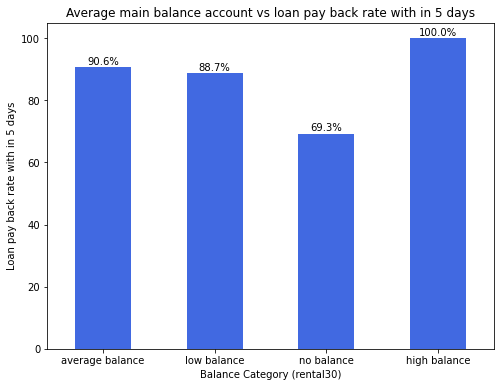

In [28]:
#ploting a graph about how much % of people are paying back the rent within 5 day

plot_balance = bal['% Subscription'].plot(kind = 'bar',
                                               color = ('royalblue'),
                                               figsize = (8,6))

pyplot.title('Average main balance account vs loan pay back rate with in 5 days')
pyplot.ylabel('Loan pay back rate with in 5 days')
pyplot.xlabel('Balance Category (rental30)')
pyplot.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

By obsering this graph we can say that in high balance group 100% of people are payig back the rent within 5 days
and where as in low and avarage balance of group there 10-12% of people are failed to pay back the rent with in the 5 days
now in low balance of groupe there total 31% of people has been failed to pay back the loan which is why it causing them a major loss 

In [29]:

for column in [df1]:
    column.loc[column["fr_ma_rech30"] <=0,  'frequency_group'] = 'no frequency'
    column.loc[(column['fr_ma_rech30'] > 0) & (column['fr_ma_rech30'] <=1 ), 'frequency_group'] = 'low frequency'
    column.loc[(column['fr_ma_rech30'] >1) & (column['fr_ma_rech30'] <=2), 'frequency_group'] = 'medium frequency'
    column.loc[(column['fr_ma_rech30'] >2), 'frequency_group'] = 'high frequency'

In [30]:
df1

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0       ...              6.0                 0.0          2.0            12   
1       ...             12.0                 0.0          1.0            12   
2       ...              6.0                 0.0          1.0             6   
3       ...              6.0                 0.0          2.0            12   
4       ...              6.0                 0.0          7.0            42   
...     ...              ...                 ...          ...           ...   
209588  ...              6.0                 0.0          2.0            12   
209589  ...              6.0                 0.0          3.0            18   
209590  ...             12.0                 0.0          6.0            54   
209591  ...             12.0                 0.0          3.0            24   
209592  ...             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  \
0                     6                 0.0  29.000000  29.000000   
1                    12                 0.0   0.000000   0.000000   
2                     6                 0.0   0.000000   0.000000   
3                     6                 0.0   0.000000   0.000000   
4                     6                 0.0   2.333333   2.333333   
...                 ...                 ...        ...        ...   
209588                6                 0.0   1.000000   1.000000   
209589                6                 0.0   1.000000   1.000000   
209590               12                 0.0   4.000000   3.833333   
209591               12                 0.0   0.000000  10.500000   
209592               12                 0.0   0.000000   0.000000   

        balance_group   frequency_group  
0         low balance    high frequency  
1         low balance      no frequency  
2         low balance      no frequency  
3         low balance      no frequency  
4         low balance  medium frequency  
...               ...               ...  
209588    low balance  medium frequency  
209589    low balance     low frequency  
20

In [31]:
count_fre_response_pct = pd.crosstab(df1['label'],df1['frequency_group']).apply(lambda x: x/x.sum() * 100)
count_fre_response_pct = count_fre_response_pct.transpose()

In [32]:
count_fre_response_pct

label                     0          1
frequency_group                       
high frequency     5.481040  94.518960
low frequency      4.304873  95.695127
medium frequency   3.787999  96.212001
no frequency      24.870684  75.129316

In [33]:
df1['frequency_group'].value_counts()

high frequency      89691
no frequency        78683
low frequency       22370
medium frequency    18849
Name: frequency_group, dtype: int64

In [34]:
fre = pd.DataFrame(df1['frequency_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
fre['% Subscription'] = count_fre_response_pct[1]
fre.drop('frequency_group',axis = 1,inplace = True)

fre['fre'] = [1,2,0,3]
fre= fre.sort_values('fre',ascending = True)

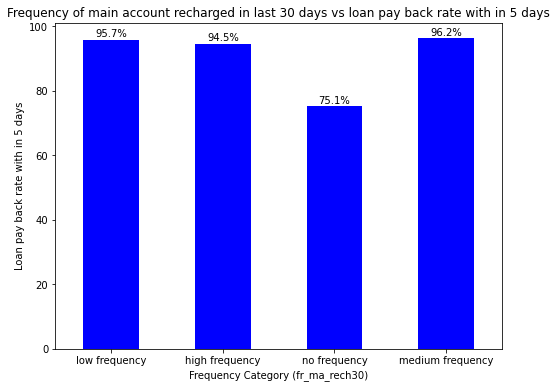

In [35]:
#plotting the group of account frequency rechare and paying back the rent withon 5 days
plot_fre = fre['% Subscription'].plot(kind = 'bar',
                                               color = ('blue'),
                                               figsize = (8,6))

pyplot.title('Frequency of main account recharged in last 30 days vs loan pay back rate with in 5 days')
pyplot.ylabel('Loan pay back rate with in 5 days')
pyplot.xlabel('Frequency Category (fr_ma_rech30)')
pyplot.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre.patches,
                      fre['% Subscription'].round(1).astype(str)):
    plot_fre.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

By this observation we can say that, in every there are no 100% amount of people are paying back the loan with in 5 days.

from the above observation,in low,hight & midium frequncy there 4-5.5% of people are not paying back the loan with in 5 days of time

on the other hand, in the low frequncey group there are above 20% of people have failed to pay back the loan with in 5 days of time and thus it conclued that company is in loss

In [36]:
#counting loan frqunbcy group of people

for column in [df1]:
    column.loc[column["cnt_loans30"] <=0,  'loan_frequency_group'] = 'no loans'
    column.loc[(column['cnt_loans30'] > 0) & (column['cnt_loans30'] <=1 ), 'loan_frequency_group'] = 'low num of loans'
    column.loc[(column['cnt_loans30'] >1) & (column['cnt_loans30'] <=4), 'loan_frequency_group'] = 'medium num of loans'
    column.loc[(column['cnt_loans30'] >4), 'loan_frequency_group'] = 'high num of loans'

In [37]:
df1

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0       ...                 0.0          2.0            12                6   
1       ...                 0.0          1.0            12               12   
2       ...                 0.0          1.0             6                6   
3       ...                 0.0          2.0            12                6   
4       ...                 0.0          7.0            42                6   
...     ...                 ...          ...           ...              ...   
209588  ...                 0.0          2.0            12                6   
209589  ...                 0.0          3.0            18                6   
209590  ...                 0.0          6.0            54               12   
209591  ...                 0.0          3.0            24               12   
209592  ...                 0.0          2.0            18               12   

        medianamnt_loans90  payback30  payback90  balance_group  \
0                      0.0  29.000000  29.000000    low balance   
1                      0.0   0.000000   0.000000    low balance   
2                      0.0   0.000000   0.000000    low balance   
3                      0.0   0.000000   0.000000    low balance   
4                      0.0   2.333333   2.333333    low balance   
...                    ...        ...        ...            ...   
209588                 0.0   1.000000   1.000000    low balance   
209589                 0.0   1.000000   1.000000    low balance   
209590                 0.0   4.000000   3.833333    low balance   
209591                 0.0   0.000000  10.500000    low balance   
209592                 0.0   0.000000   0.000000    low balance   

         frequency_group  loan_frequency_group  
0         high frequency   medium num of loans  
1           no frequency      low num of loans  
2           no frequency      low num of loans  
3           no frequency   medium num of loans  
4       medium frequency     high num of loans  
...                  ...                   ...  
209588  medium frequency   medium num of loans  
209589     l

In [38]:
count_loan_response_pct = pd.crosstab(df1['label'],df1['loan_frequency_group']).apply(lambda x: x/x.sum() * 100)
count_loan_response_pct = count_loan_response_pct.transpose()

In [39]:
count_loan_response_pct

label                         0           1
loan_frequency_group                       
high num of loans      1.619592   98.380408
low num of loans      23.972816   76.027184
medium num of loans    6.401495   93.598505
no loans               0.000000  100.000000

In [40]:
df1['loan_frequency_group'].value_counts()

medium num of loans    87214
low num of loans       83432
high num of loans      35688
no loans                3259
Name: loan_frequency_group, dtype: int64

In [41]:
fre = pd.DataFrame(df1['loan_frequency_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
fre['% Subscription'] = count_loan_response_pct[1]
fre.drop('loan_frequency_group',axis = 1,inplace = True)

fre['fre'] = [1,2,0,3]
fre= fre.sort_values('fre',ascending = True)

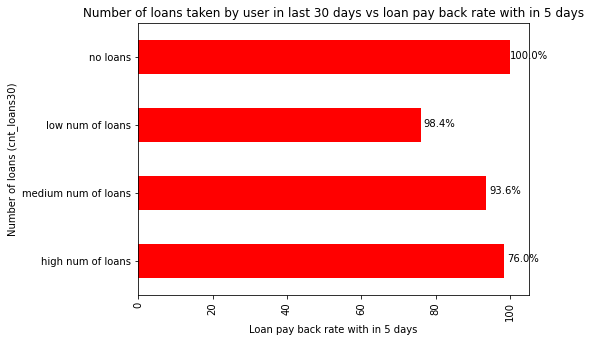

In [42]:
#
plot_fre = fre['% Subscription'].plot(kind = 'barh',
                                               color = ('red'), figsize = (7,5))

pyplot.title('Number of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
pyplot.ylabel('Number of loans (cnt_loans30)')
pyplot.xlabel('Loan pay back rate with in 5 days')
pyplot.xticks(rotation = 'vertical')

# label the bar
for rec, label in zip(plot_fre.patches,
                      fre['% Subscription'].round(1).sort_values(ascending = True).round(1).astype(str)):
    plot_fre.text(rec.get_width()+5, 
                  rec.get_y()+ rec.get_height()-0.3, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

By observing this graph we can say that about the group of people which are catagorized into 4 groups of people are taken the loan paying back rent with in 5 days

As per the in the data set people not taken loans are labelled as "1". So we should not consider the people with no loans labelled in the above graph. 

Considering the remaining levels, there is no 100% rate in any of the loan levels to pay back the loan within 5 days
Coming to the high number of loan level people it is observed that around 25% of people are not paying the loan within 5 days. Only 2% of the people from low number of loans category are not paying the loan within 5 days. This is followed by the people with medium number of loans having defaulters of 7% approximately

In [43]:
for column in [df1]:
    column.loc[column["amnt_loans30"] <=0,  'loanamnt_frequency_group'] = 'no loans'
    column.loc[(column['amnt_loans30'] > 0) & (column['amnt_loans30'] <=6 ), 'loanamnt_frequency_group'] = 'low amnt of loans'
    column.loc[(column['amnt_loans30'] >6) & (column['amnt_loans30'] <=24), 'loanamnt_frequency_group'] = 'medium amnt of loans'
    column.loc[(column['amnt_loans30'] >24), 'loanamnt_frequency_group'] = 'high amnt of loans'

In [44]:
df1

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0       ...          2.0            12                6                 0.0   
1       ...          1.0            12               12                 0.0   
2       ...          1.0             6                6                 0.0   
3       ...          2.0            12                6                 0.0   
4       ...          7.0            42                6                 0.0   
...     ...          ...           ...              ...                 ...   
209588  ...          2.0            12                6                 0.0   
209589  ...          3.0            18                6                 0.0   
209590  ...          6.0            54               12                 0.0   
209591  ...          3.0            24               12                 0.0   
209592  ...          2.0            18               12                 0.0   

        payback30  payback90  balance_group   frequency_group  \
0       29.000000  29.000000    low balance    high frequency   
1        0.000000   0.000000    low balance      no frequency   
2        0.000000   0.000000    low balance      no frequency   
3        0.000000   0.000000    low balance      no frequency   
4        2.333333   2.333333    low balance  medium frequency   
...           ...        ...            ...               ...   
209588   1.000000   1.000000    low balance  medium frequency   
209589   1.000000   1.000000    low balance     low frequency   
209590   4.000000   3.833333    low balance    high frequency   
209591   0.000000  10.500000    low balance    high frequency   
209592   0.000000   0.000000    low balance     low frequency   

        loan_frequency_group  loanamnt_frequency_group  
0        medium num of loans      medium amnt of loans  
1           low num of loans      medium amnt of loans  
2           low num of loans         low amnt of loans  
3        medium num of loans      medium amnt of loans  
4          high num of loans        high amnt of loans  
...                      ...                       ...  
209588   medium num of loans 

In [45]:
count_loanamnt_response_pct = pd.crosstab(df1['label'],df1['loanamnt_frequency_group']).apply(lambda x: x/x.sum() * 100)
count_loanamnt_response_pct = count_loanamnt_response_pct.transpose()

In [46]:
count_loanamnt_response_pct

label                             0           1
loanamnt_frequency_group                       
high amnt of loans         1.736214   98.263786
low amnt of loans         25.652571   74.347429
medium amnt of loans       6.508086   93.491914
no loans                   0.000000  100.000000

In [47]:
df1['loanamnt_frequency_group'].value_counts()

medium amnt of loans    89166
low amnt of loans       76620
high amnt of loans      40548
no loans                 3259
Name: loanamnt_frequency_group, dtype: int64

In [48]:
fre1 = pd.DataFrame(df1['loanamnt_frequency_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
fre1['% Subscription'] = count_loanamnt_response_pct[1]
fre1.drop('loanamnt_frequency_group',axis = 1,inplace = True)

fre1['fre1'] = [1,2,0,3]
fre1= fre1.sort_values('fre1',ascending = True)

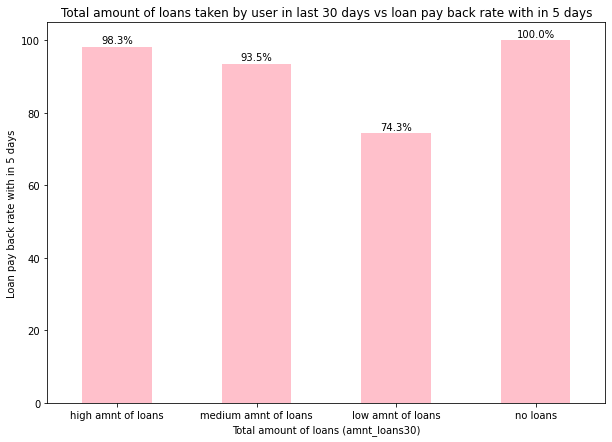

In [49]:
plot_fre1 = fre1['% Subscription'].plot(kind = 'bar',
                                               color = ('pink'), figsize = (10,7))

pyplot.title('Total amount of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
pyplot.ylabel('Loan pay back rate with in 5 days')
pyplot.xlabel('Total amount of loans (amnt_loans30)')
pyplot.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre1.patches,
                      fre1['% Subscription'].round(1).astype(str)):
    plot_fre1.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

In [50]:
# dropiing out the columns which was created for analysis 

df1.drop(['balance_group','frequency_group','loan_frequency_group','loanamnt_frequency_group'],axis=1,inplace=True)
df1

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0       ...            2            12              6.0                 0.0   
1       ...            1            12             12.0                 0.0   
2       ...            1             6              6.0                 0.0   
3       ...            2            12              6.0                 0.0   
4       ...            7            42              6.0                 0.0   
...     ...          ...           ...              ...                 ...   
209588  ...            2            12              6.0                 0.0   
209589  ...            3            18              6.0                 0.0   
209590  ...            4            42             12.0                 0.0   
209591  ...            2            18             12.0                 0.0   
209592  ...            2            18             12.0                 0.0   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0               2.0            12                6                 0.0   
1               1.0            12               12                 0.0   
2               1.0             6                6                 0.0   
3               2.0            12                6                 0.0   
4               7.0            42                6                 0.0   
...             ...           ...              ...                 ...   
209588          2.0            12                6                 0.0   
209589          3.0            18                6                 0.0   
209590          6.0            54               12                 0.0   
209591          3.0            24               12                 0.0   
209592          2.0            18               12                 0.0   

        payback30  payback90  
0       29.000000  29.000000  
1        0.000000   0.000000  
2        0.000000   0.000000  
3        0.000000   0.000000  
4        2.333333   2.333333  
...           ...        ...  
209588   1.000000   1.000000  
209589   1.000000   1.000000  
209590   4.000000   3.833333  
209591   0

By observing this graph we can say that about the group of people which are catagorized into 4 groups of people are taken the loan paying back rent with in 5 days

From above 3 groups high, medium and low amount of loans there are no one whos payin back the loan within the 5 days

By observiong we can infer that in high and medium group there are 2-7% of people are not paying back the loan within 5days
and where as in low loans group there are 26% of people are not paying back the loan with in 5 days and thay casues to major loss to the company 

<AxesSubplot:>

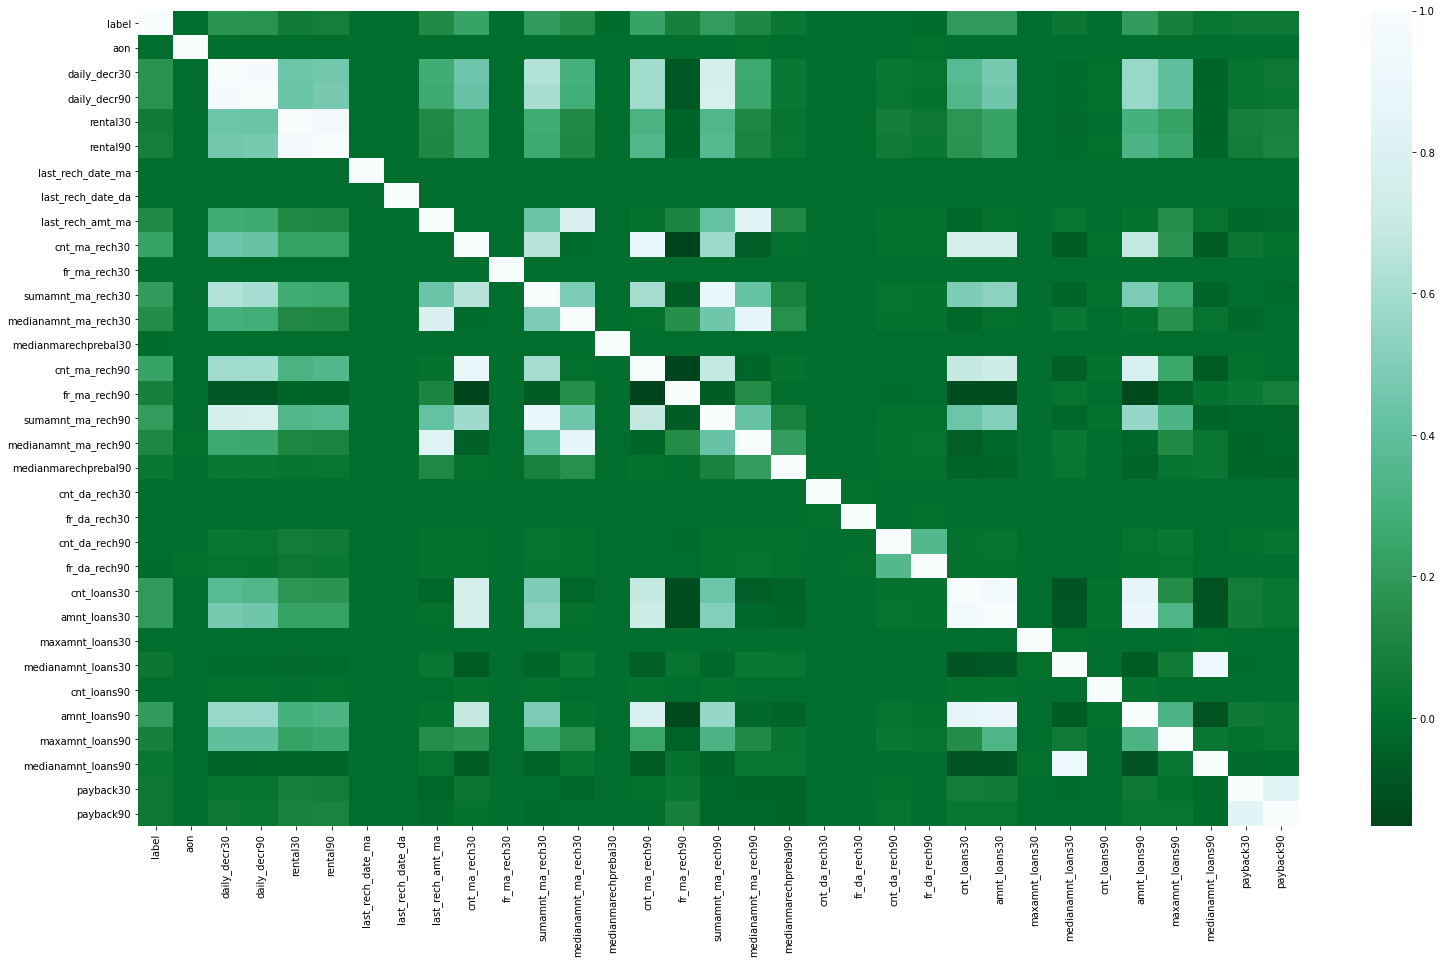

In [51]:
pyplot.figure(figsize=(26,15))
df1corr=df1.corr()
sns.heatmap(df1corr,cmap='BuGn_r',annot=None)

<AxesSubplot:>

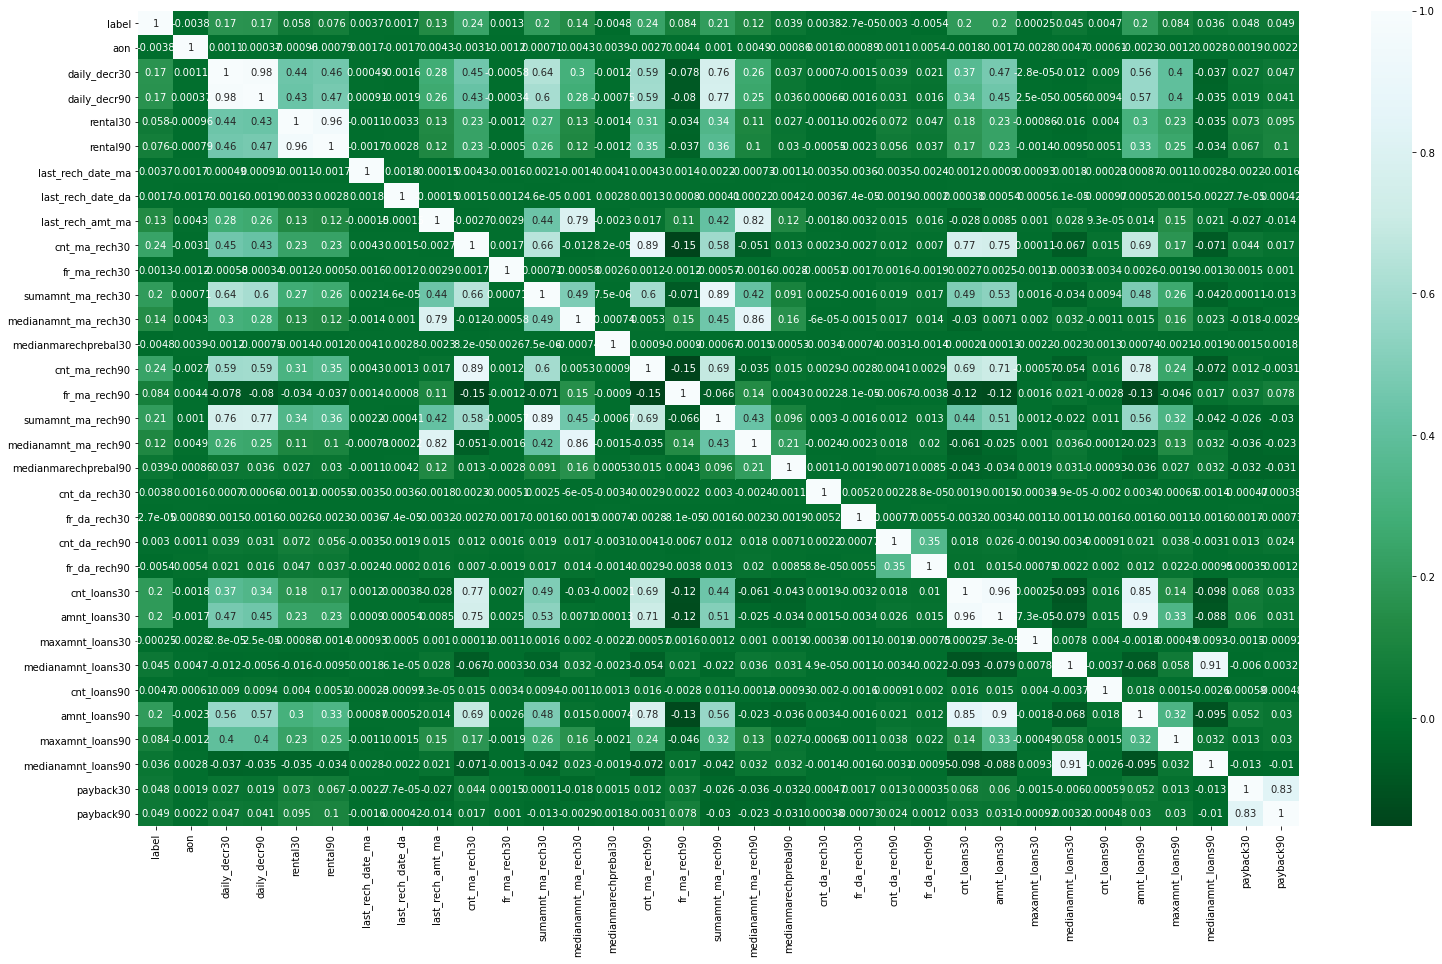

In [52]:
pyplot.figure(figsize=(26,15))
df1corr=df1.corr()
sns.heatmap(df1corr,cmap='BuGn_r',annot=True)

In [53]:
df1_new=df1.copy()

In [54]:
#dropping out the coloumns which has been negativly correlated with the object 
df1_new.drop(['last_rech_date_da','fr_da_rech30','maxamnt_loans30','medianamnt_loans30','maxamnt_loans90','medianamnt_loans90','cnt_da_rech30','cnt_da_rech90','fr_da_rech90'],axis=1,inplace=True)

In [56]:
colls=df1_new.columns

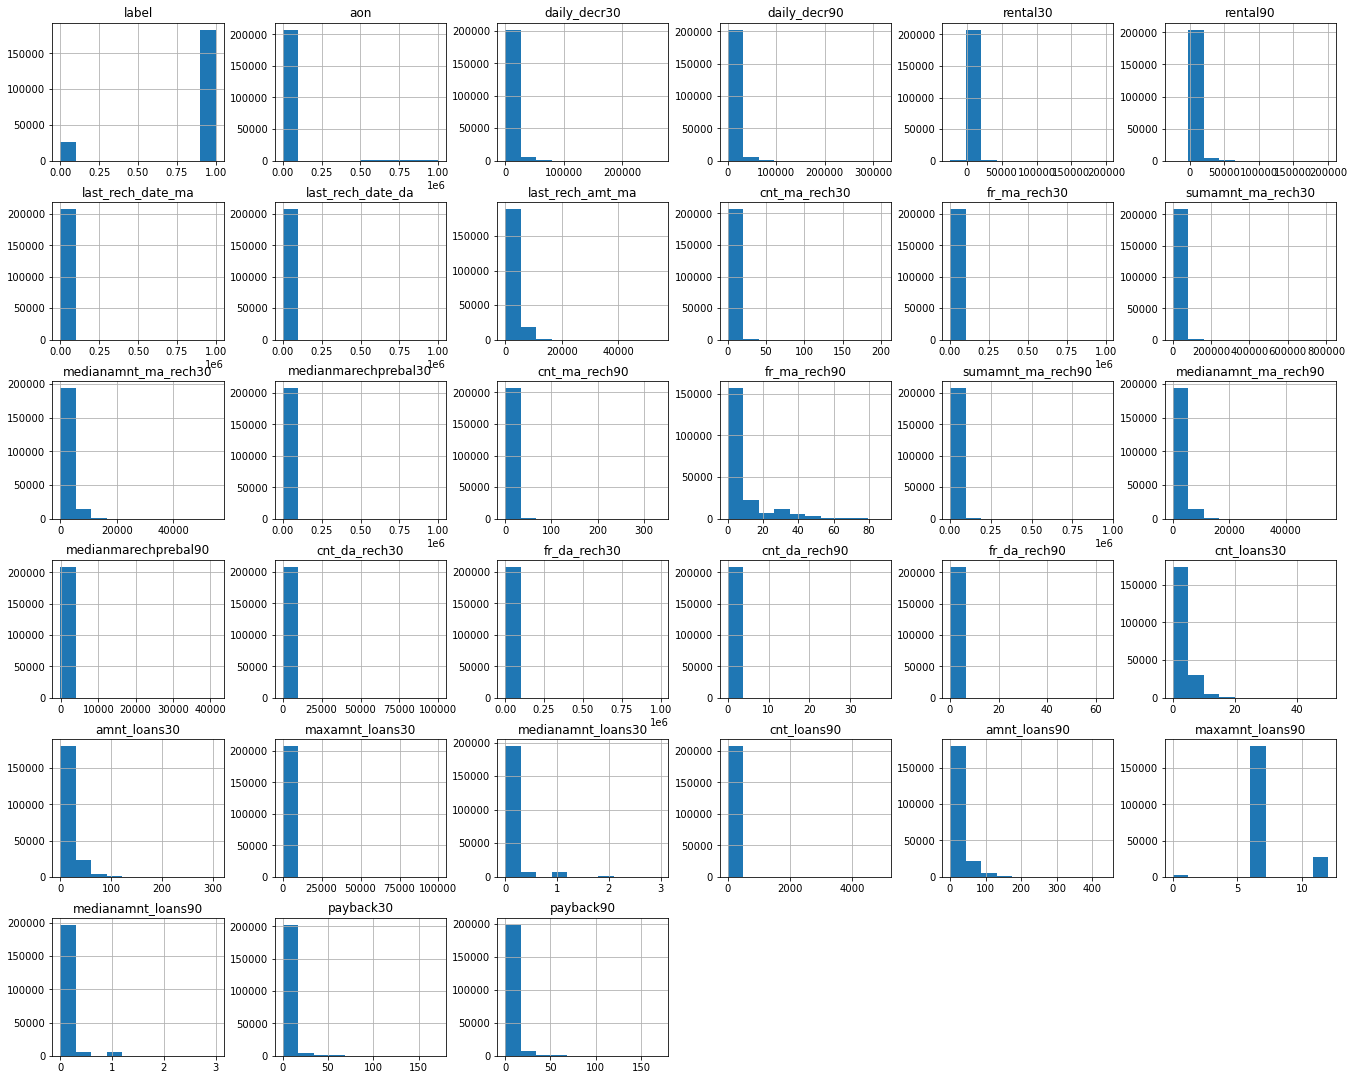

In [57]:
#checking for normaliztion
fig_size=pyplot.rcParams['figure.figsize']
fig_size[0]=23
fig_size[1]=19
pyplot.rcParams['figure.figsize']=fig_size
df1.hist()
pyplot.show()

In [58]:
df1.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

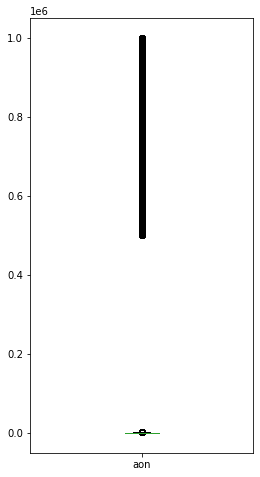

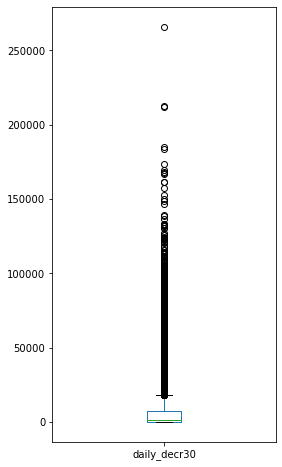

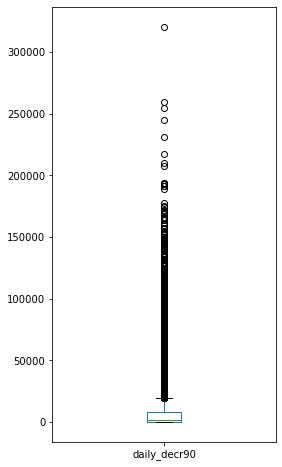

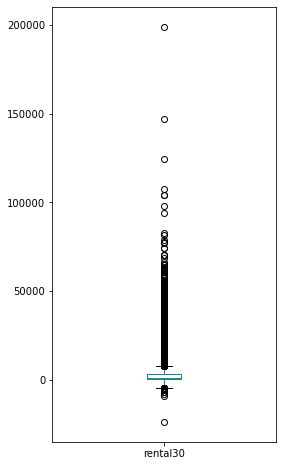

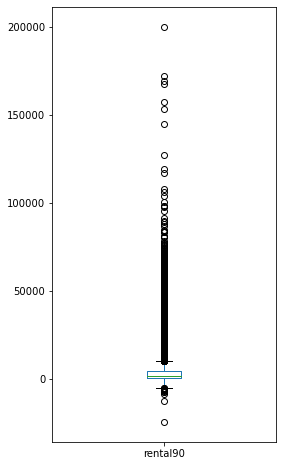

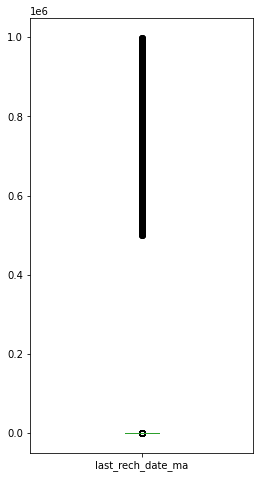

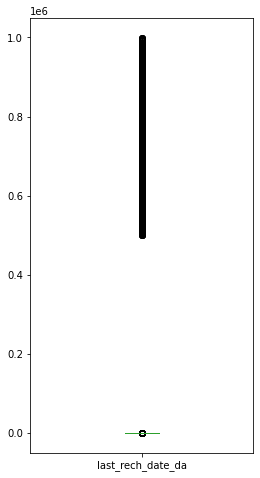

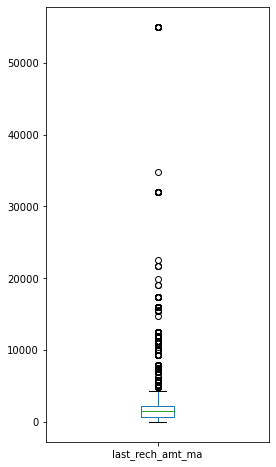

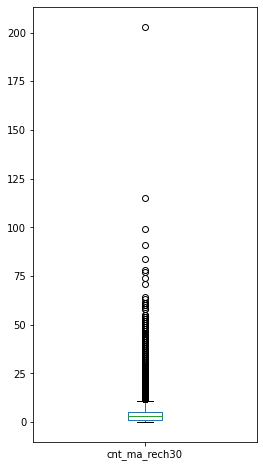

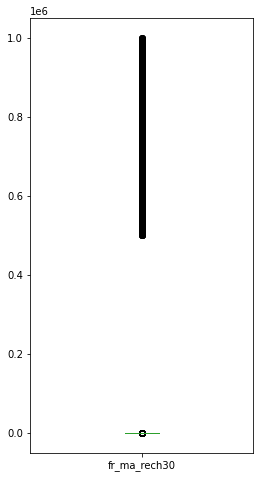

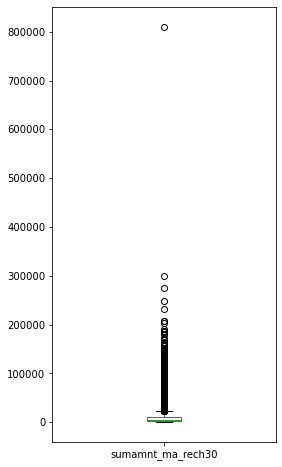

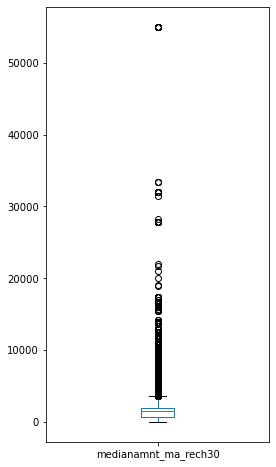

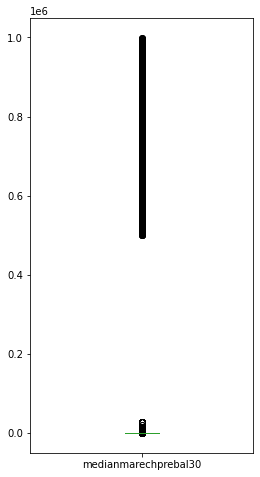

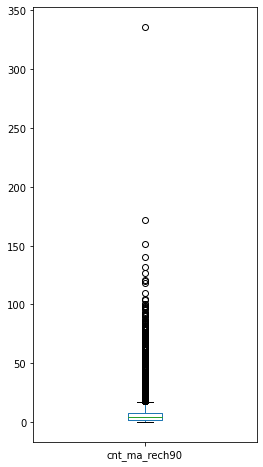

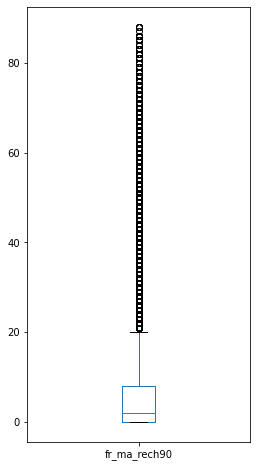

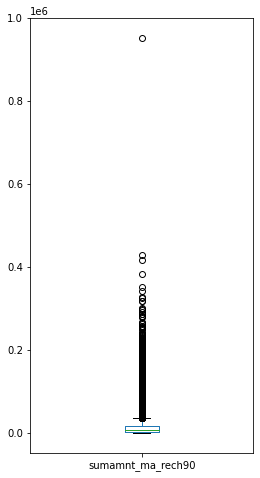

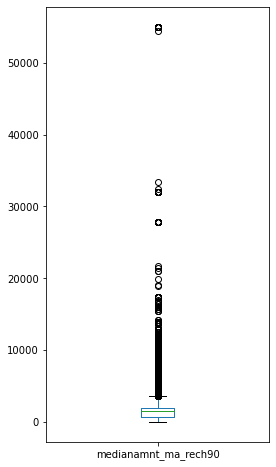

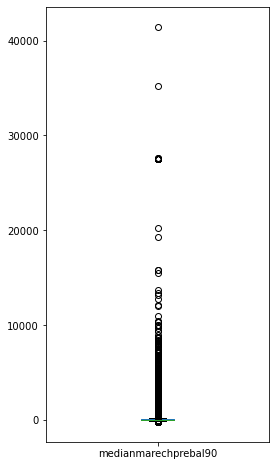

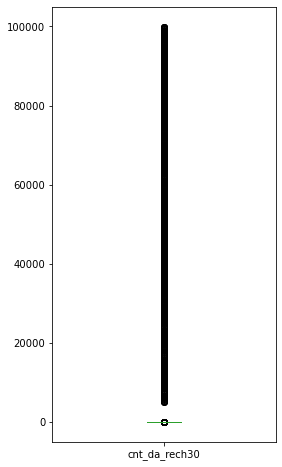

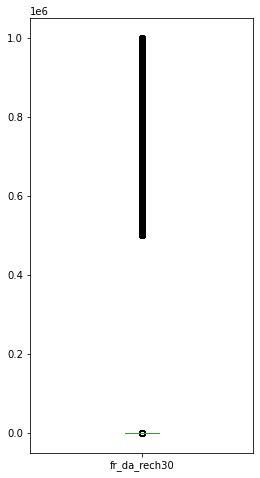

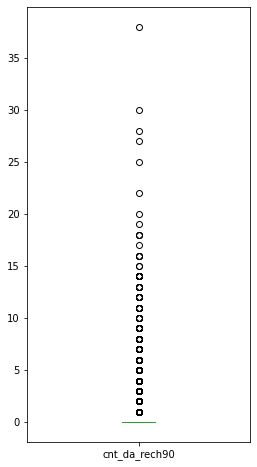

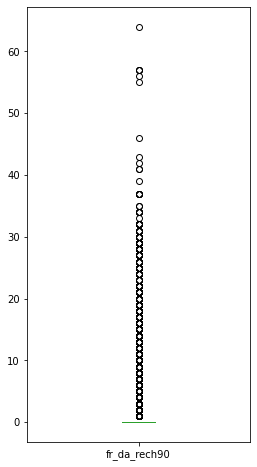

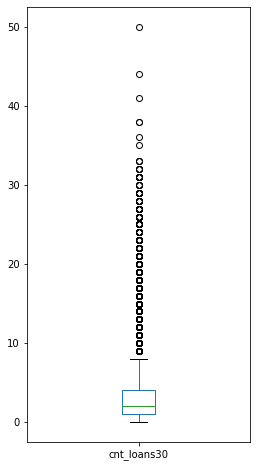

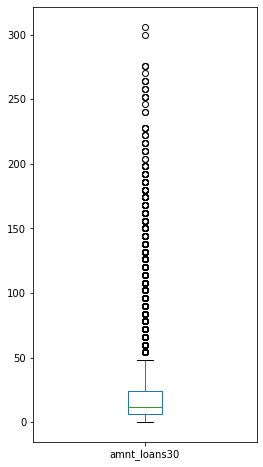

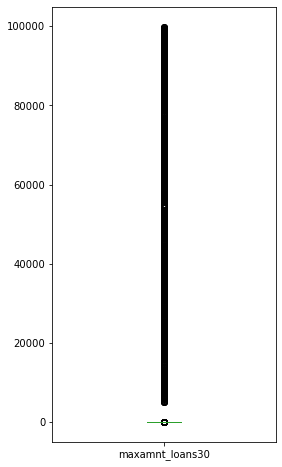

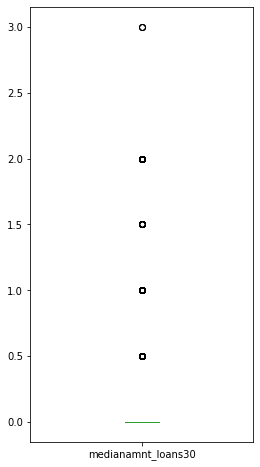

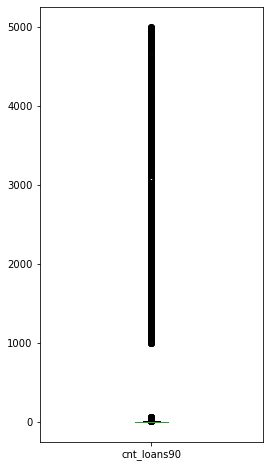

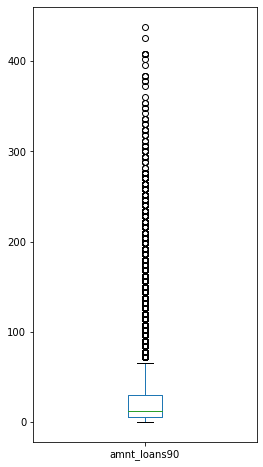

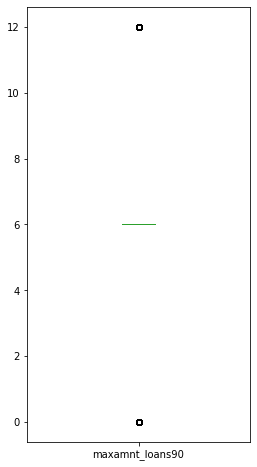

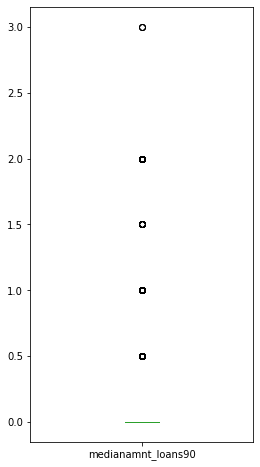

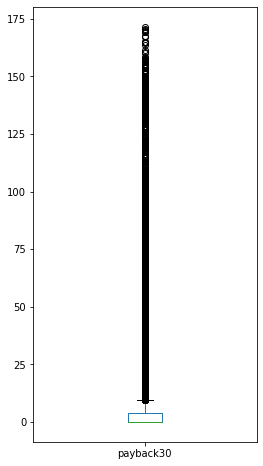

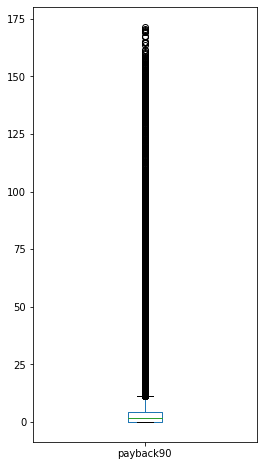

In [59]:
#Checkling for outliers in each columns by using loop
for i in df1[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']]:
    pyplot.figure(figsize=(4,8))
    df1[i].plot.box()
    pyplot.show()
    

# Data Cleaning:

**outlier Transformation**

In [61]:
df2=df1.copy()

# Zscore Method-

To deal with the outliers just by simply removing them can the data loss which is prtty much valueble in the accet, so.

For this data set I simply choose mean for imputing the outliers with the respective features. After performing mean, I also applied cube root for the data to bring data closer as to make the distribution normal.

so i guess, outlier imputation is far better than simply removing the outliers from the data

In [62]:
#Outliers removing by using zscore methond
colls=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']
for i in range(len(colls)):
    df2[colls[i]]=zscore(df2[colls[i]])
    for j in range(len(df2[colls[i]])):
        if df2[colls[i]][j]>3 or df2[colls[i]][j]<-3:
            df2[colls[i]].replace(df2[colls[i]][j],df2[colls[i]].median(),inplace=True)
    df2[colls[i]]=np.cbrt((df2[colls[i]]))

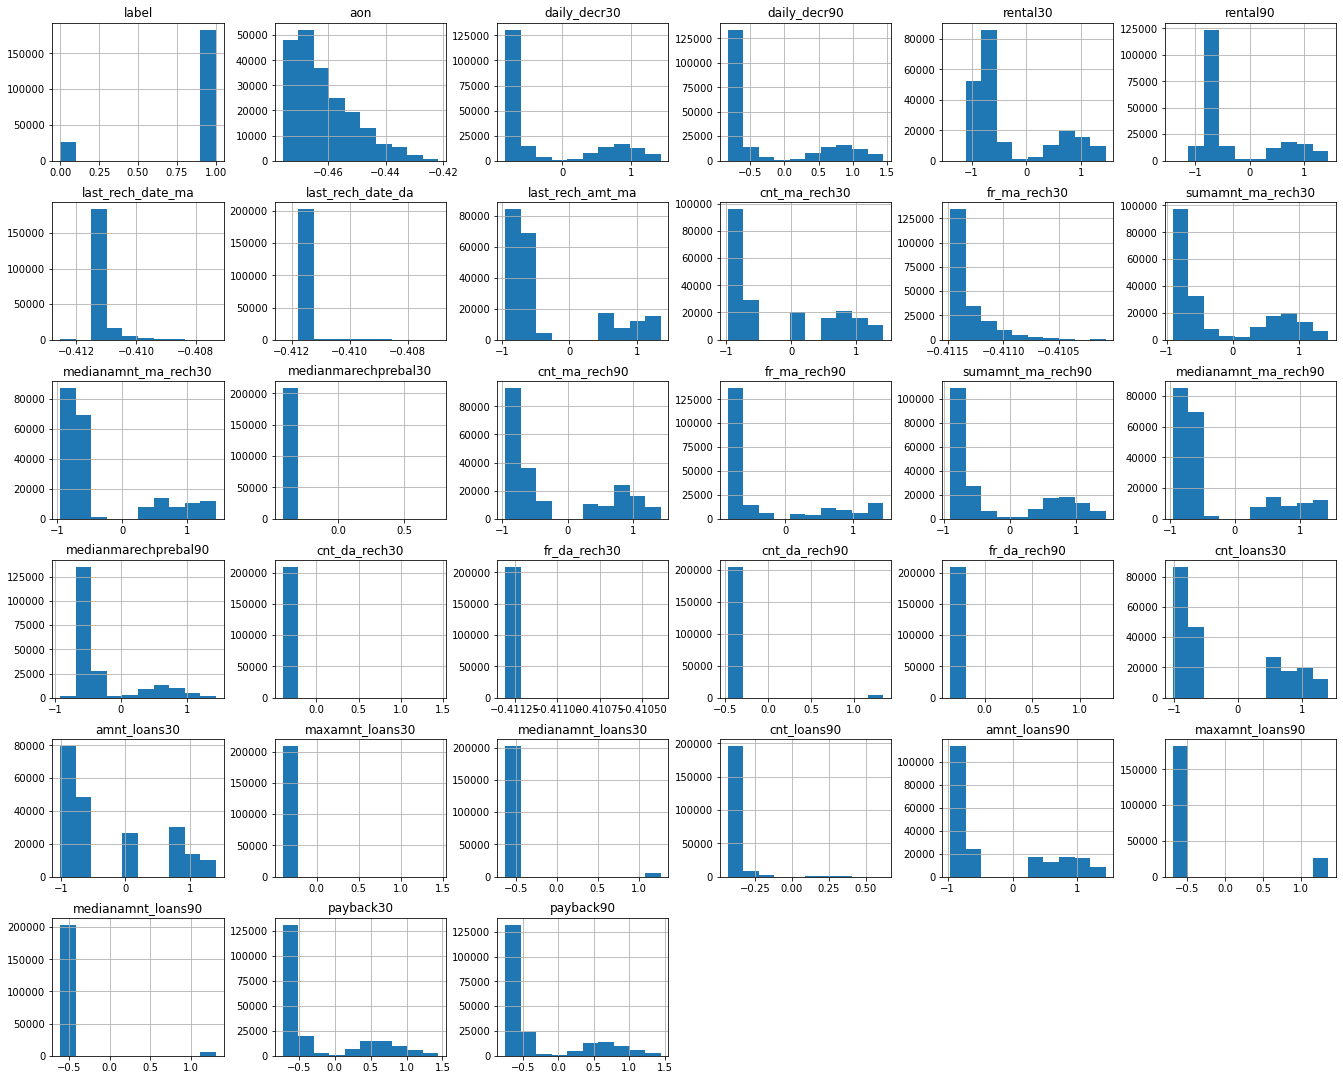

In [63]:
#checking for normaliztion
fig_size=pyplot.rcParams['figure.figsize']
fig_size[0]=23
fig_size[1]=19
pyplot.rcParams['figure.figsize']=fig_size
df2.hist()
pyplot.show()

# VIF

**Variance Inflation Factor**

Importing Variance Inflation Factor to check the multicollinearity for weather the colums are needed to do "PCA(Principal Component Analysis)" or not

In [68]:
df2

label       aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0 -0.469628     -0.631886     -0.651355 -0.830994 -0.823561   
1           1 -0.460673      0.900837      0.820996  0.614277  0.330255   
2           1 -0.464317     -0.755959     -0.754218 -0.746514 -0.764987   
3           1 -0.470246     -0.834590     -0.821858 -0.837741 -0.832051   
4           1 -0.455745     -0.827820     -0.815968 -0.717832 -0.744840   
...       ...       ...           ...           ...       ...       ...   
209588      1 -0.466978     -0.827754     -0.815910 -0.719287 -0.745850   
209589      1 -0.453015     -0.833774     -0.821147 -0.607129 -0.672501   
209590      1 -0.454341      0.888238      0.810890  0.902695  0.978717   
209591      1 -0.438454      0.916865      0.840875 -0.808937 -0.756558   
209592      1 -0.441886     -0.459066     -0.521399 -0.800323 -0.790661   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0               -0.411415                0.0         -0.605175      -0.774598   
1               -0.410757                0.0          1.162295      -0.887785   
2               -0.411379                0.0         -0.605175      -0.887785   
3               -0.409986                0.0         -0.778238      -0.977733   
4               -0.411342                0.0          0.468983       0.892125   
...                   ...                ...               ...            ...   
209588          -0.411452                0.0          0.942288      -0.612517   
209589          -0.411342                0.0         -0.816700       0.172753   
209590          -0.411379                0.0         -0.605175       0.621545   
209591          -0.411415               38.0         -0.816700       0.621545   
209592          -0.411013                0.0          1.320712      -0.774598   

        ...  cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0       ...    -0.667281     -0.699639              6.0                 0.0   
1       ...    -0.883050     -0.699639             12.0                 0.0   
2       ...    -0.883050     -0.882673              6.0                 0.0   
3       ...    -0.667281     -0.699639              6.0                 0.0   
4       ...     1.184100      1.114326              6.0                 0.0   
...     ...          ...           ...              ...                 ...   
209588  ...    -0.667281     -0.699639              6.0                 0.0   
209589  ...     0.455249      0.140282              6.0                 0.0   
209590  ...     0.786124      1.114326             12.0                 0.0   
209591  ...    -0.667281      0.140282             12.0                 0.0   
209592  ...    -0.667281      0.140282             12.0                 0.0   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0         -0.418872     -0.760562                6                 0.0   
1         -0.427158     -0.760562               12                 0.0   
2         -0.427158     -0.873562                6                 0.0   
3         -0.418872     -0.760562                6                 0.0   
4         -0.371449      0.885112                6                 0.0   
...             ...           ...              ...                 ...   
209588    -0.418872     -0.760562                6                 0.0   
209589    -0.410244     -0.597468                6                 0.0   
209590    -0.381899      1.046706               12                 0.0   
209591    -0.410244      0.237500               12                 0.0   
209592    -0.418872     -0.597468               12                 0.0   

        payback30  payback90  
0        1.426813   1.337767  
1       -0.727875  -0.748431  
2       -0.727875  -0.748431  
3       -0.727875  -0.748431  
4       -0.494459  -0.577773  
...           ...        ...  
209588  -0.648057  -0.685569  
209589  -0.648057  -0.685569  
209590   0.408583

In [ ]:
df2.drop('label',axis=1,inplace=True)

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [177]:
vif= pd.DataFrame()
vif['Column Names'] = df2.columns
vif['vif']=[variance_inflation_factor(df2.values,i) for i in range(df2.shape[1])]

In [178]:
vif[vif['vif']>4]

Column Names           vif
0                    aon  1.964279e+03
1           daily_decr30  1.249489e+01
2           daily_decr90  1.301443e+01
3               rental30  6.177588e+00
4               rental90  6.725150e+00
5      last_rech_date_ma  1.738138e+06
6      last_rech_date_da  4.392088e+06
8          cnt_ma_rech30  4.512458e+00
9           fr_ma_rech30  6.074839e+06
10     sumamnt_ma_rech30  4.333607e+00
11  medianamnt_ma_rech30  5.734394e+00
12  medianmarechprebal30  2.943865e+02
13         cnt_ma_rech90  4.905583e+00
15     sumamnt_ma_rech90  4.881437e+00
16  medianamnt_ma_rech90  5.502455e+00
18         cnt_da_rech30  1.306652e+02
19          fr_da_rech30  1.283496e+07
20         cnt_da_rech90  6.944596e+00
21          fr_da_rech90  9.372600e+01
22           cnt_loans30  1.011724e+01
23          amnt_loans30  1.225684e+01
24       maxamnt_loans30  1.421631e+02
25    medianamnt_loans30  9.180847e+00
26           cnt_loans90  3.010675e+01
27          amnt_loans90  5.103061e+00
29    medianamnt_loans90  9.698635e+00
30             payback30  4.042264e+00

From the above analysis we can conclude that there are many freatures which are strongly in multicollinearity, this tells us that that we have to do PCA, otherwise it may can get effect the in model prediction

# PCA

In [69]:
from sklearn.decomposition import PCA

In [75]:
pca = PCA(n_components=13)
pca.fit(df2)
df2_new = pd.DataFrame(pca.transform(df2))
df2_new.shape

(209593, 13)

# Model Traning

Train Test split

In [108]:
#Setting up x&y labels
x=df2_new
y=df1['label']

In [87]:
x.shape,y.shape

((209593, 13), (209593,))

In [90]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3,random_state=1,shuffle=True)

In [91]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((146715, 13), (62878, 13), (146715,), (62878,))

In [103]:
from sklearn.linear_model import LogisticRegression
LC=LogisticRegression()
LC.fit(x_train,y_train)

LogisticRegression()

In [104]:
print('Training score =', LC.score(x_train, y_train))
print('Test score =', LC.score(x_test, y_test))

Training score = 0.8764475343352759
Test score = 0.8783358249308184


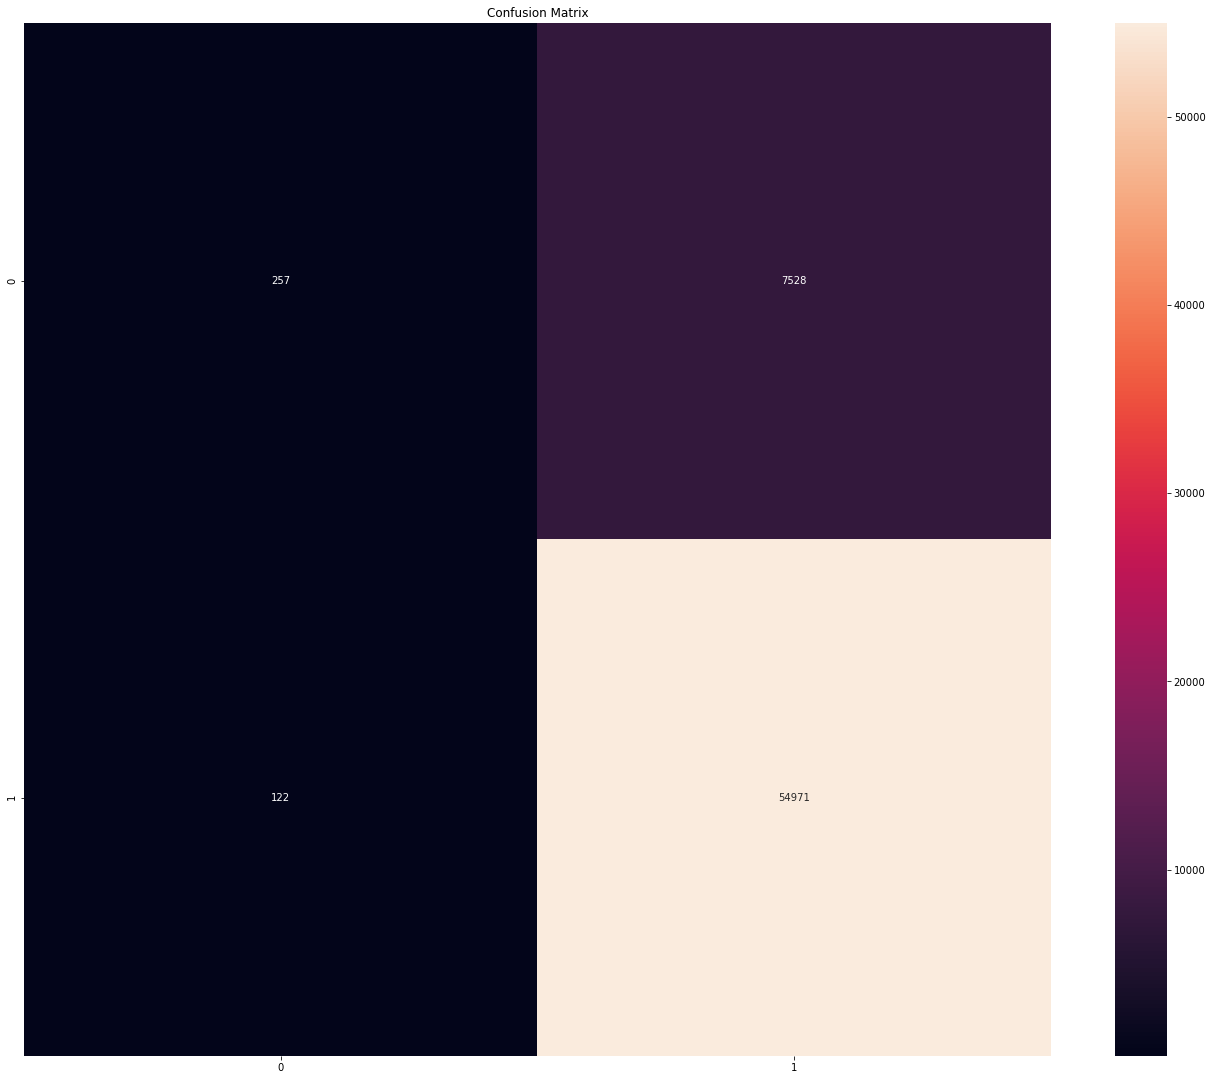

In [105]:
#confusion matrix graph
ypred = LC.predict(x_test)
c_m = confusion_matrix(y_test, ypred)
sns.heatmap(c_m, annot=True, fmt='d')
pyplot.title('Confusion Matrix')
pyplot.show()

In [106]:
tn = c_m[0,0]  #True Negative
tp = c_m[1,1]  #True Positives
fp = c_m[0,1]  #False Positives
fn = c_m[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.8783358249308184
Precision = 0.8795500728011648
Recall = 0.997785562594159
F1 Score = 0.934944554051296


ROC AUC = 0.7875093846393978


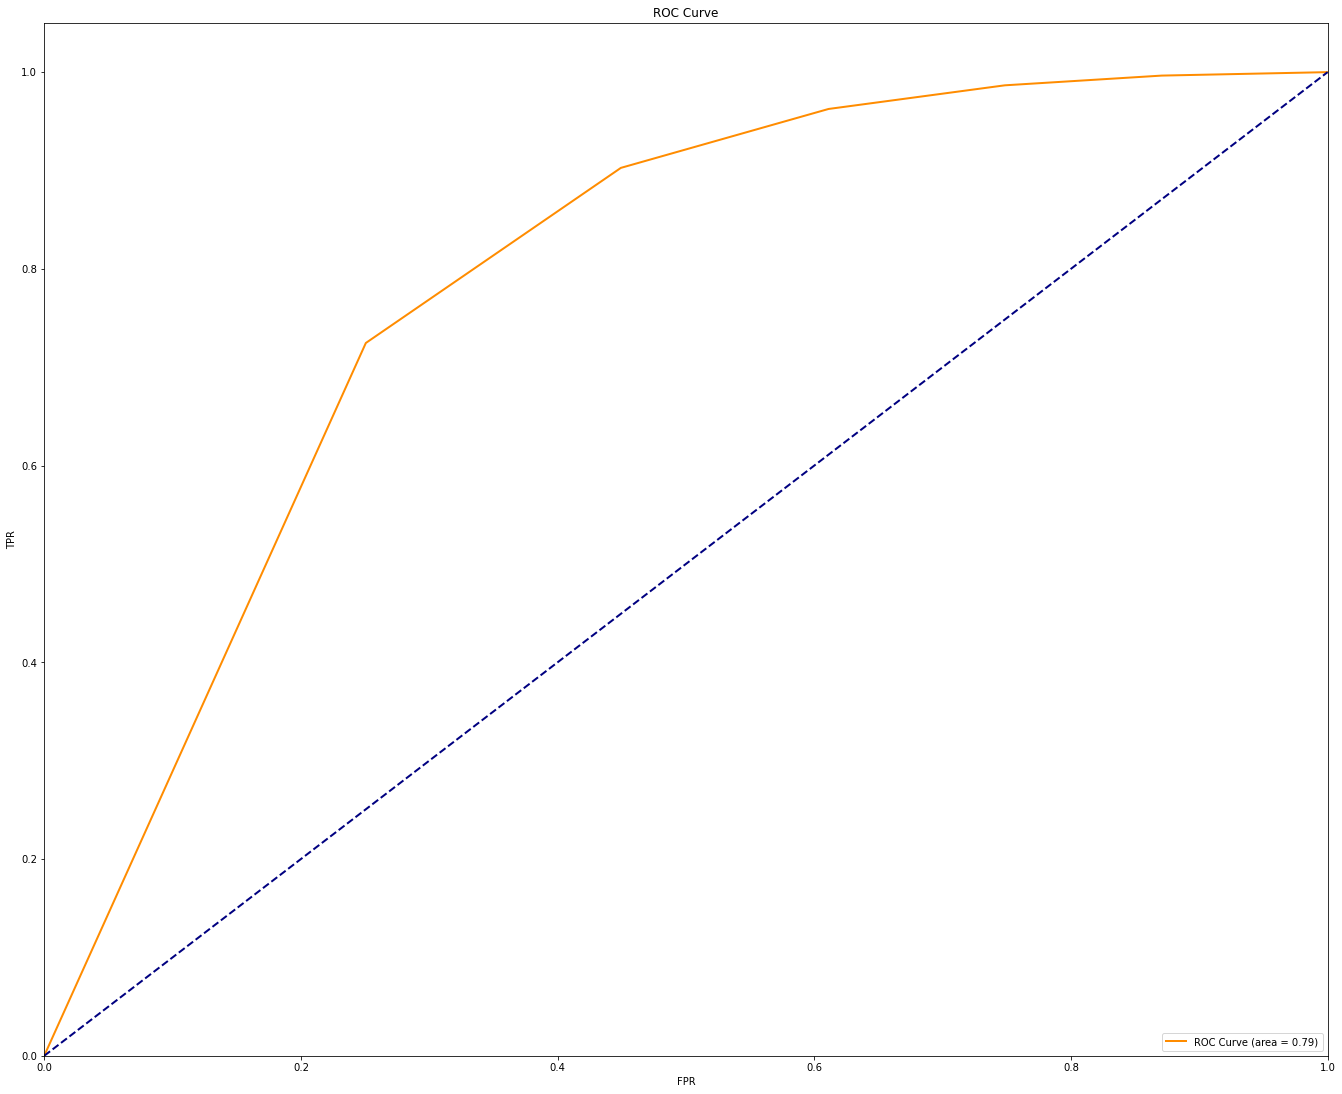

In [107]:
#AUC-ROC Curve
ypred = KnnCf.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test,ypred[:,1])
roc_auc = roc_auc_score(y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
pyplot.figure()
lw = 2
pyplot.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
pyplot.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')
pyplot.title('ROC Curve')
pyplot.legend(loc='lower right')
pyplot.show()

From the above observation we can say the model prediction of Knn and its auc roc curve is qutie good its becasue the lable which as out target varibale, let's check it out on the other models as well

**KNeighbors**

In [124]:
knn=KNeighborsClassifier()
param={'n_neighbors':np.arange(5,30),'weights':['uniform','distance']}
GS_CV=GridSearchCV(knn,param,cv=3,scoring='f1_weighted',n_jobs=-1)
GS_CV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [126]:
GS_CV.best_params_

{'n_neighbors': 23, 'weights': 'distance'}

**Decision Tree**

In [127]:
DT=DecisionTreeClassifier(random_state=0)
param={'max_depth':np.arange(3,50),'criterion':['entropy','gini'],'min_samples_leaf':np.arange(3,20)}
GsCv=GridSearchCV(DT,param,cv=3,scoring='f1_weighted',n_jobs=-1)
GsCv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
             scoring='f1_weighted')

In [128]:
GsCv.best_params_

{'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 18}

**AdaBoost**

In [130]:
Ada_bias=[]
for val in np.arange(1,20):
    Ada=AdaBoostClassifier(n_estimators=val,random_state=0)
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = cross_val_score(Ada, x_train, y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
    Ada_bias.append(1-np.mean(cv_results))

In [131]:
#n-estimaters
np.argmin(Ada_bias)

16

**GradientBoosting**

In [132]:
GB_bias=[]
for val in np.arange(1,20):
    gb=GradientBoostingClassifier(n_estimators=val)
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = cross_val_score(gb, x_train, y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
    GB_bias.append(1-np.mean(cv_results))

In [133]:
np.argmin(GB_bias)

17

**RandomForest**

In [112]:
RF_var=[]
for var in np.arange(1,50):
    RF=RandomForestClassifier(criterion='gini',n_estimators=var,random_state=0)
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results =cross_val_score(RF, x_train,y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
    RF_var.append(np.var(cv_results,ddof=1))

In [113]:
#To Get n-estimeters
np.argmin(RF_var)

7

Evaluating each model in turn

In [136]:
models = []
models.append(('Logistic', LC))
models.append(('KNN',KnnCf))
models.append(('DecisionTree',DT))
models.append(('RandomForest',RF))
models.append(('AdaBoost',Ada))

In [137]:
results = []
names = []
for name, model in models:
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = cross_val_score(model, x_train, y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    print(f"names-:{name},cv-results-:{np.mean(cv_results)},varriance-of-cv-:{np.var(cv_results,ddof=1)}")

names-:Logistic,cv-results-:0.8243025967447998,varriance-of-cv-:7.170759728625489e-06
names-:KNN,cv-results-:0.8788973893633062,varriance-of-cv-:4.173416645015251e-06
names-:DecisionTree,cv-results-:0.8517164351073641,varriance-of-cv-:5.960698793023525e-08
names-:RandomForest,cv-results-:0.8854115692617466,varriance-of-cv-:1.037528305997504e-06
names-:AdaBoost,cv-results-:0.8605018972103062,varriance-of-cv-:3.224574596713026e-05


# Algo comparison

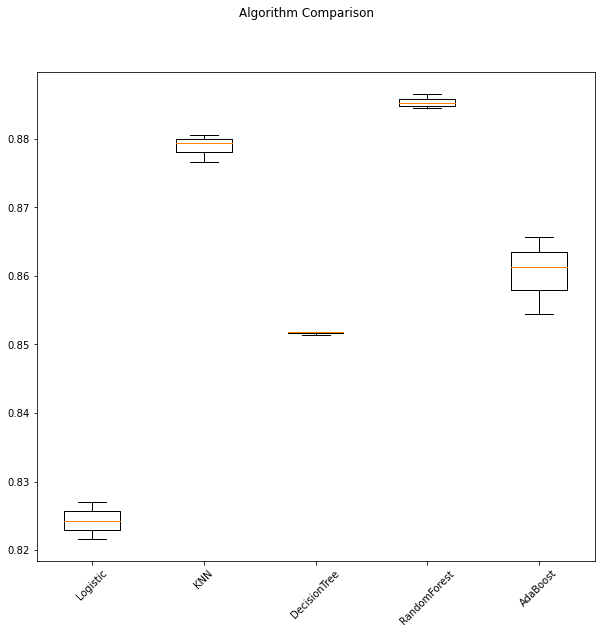

In [139]:
   # boxplot algorithm comparison
fig = pyplot.figure(figsize=(10,9))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names,rotation=45)
pyplot.show()

From above observation of the graph which tells us the model random forest is performing best here, wich is 88% vc score and 99% lesser varriance and which achived the f1-score of 98%

# Finalizing the model

# Random Forest

In [173]:
RF=RandomForestClassifier(criterion='gini',n_estimators=var,random_state=0)
RF.fit(x_train,y_train)

RandomForestClassifier(n_estimators=49, random_state=0)

In [174]:
predictions = RF.predict(x_test)

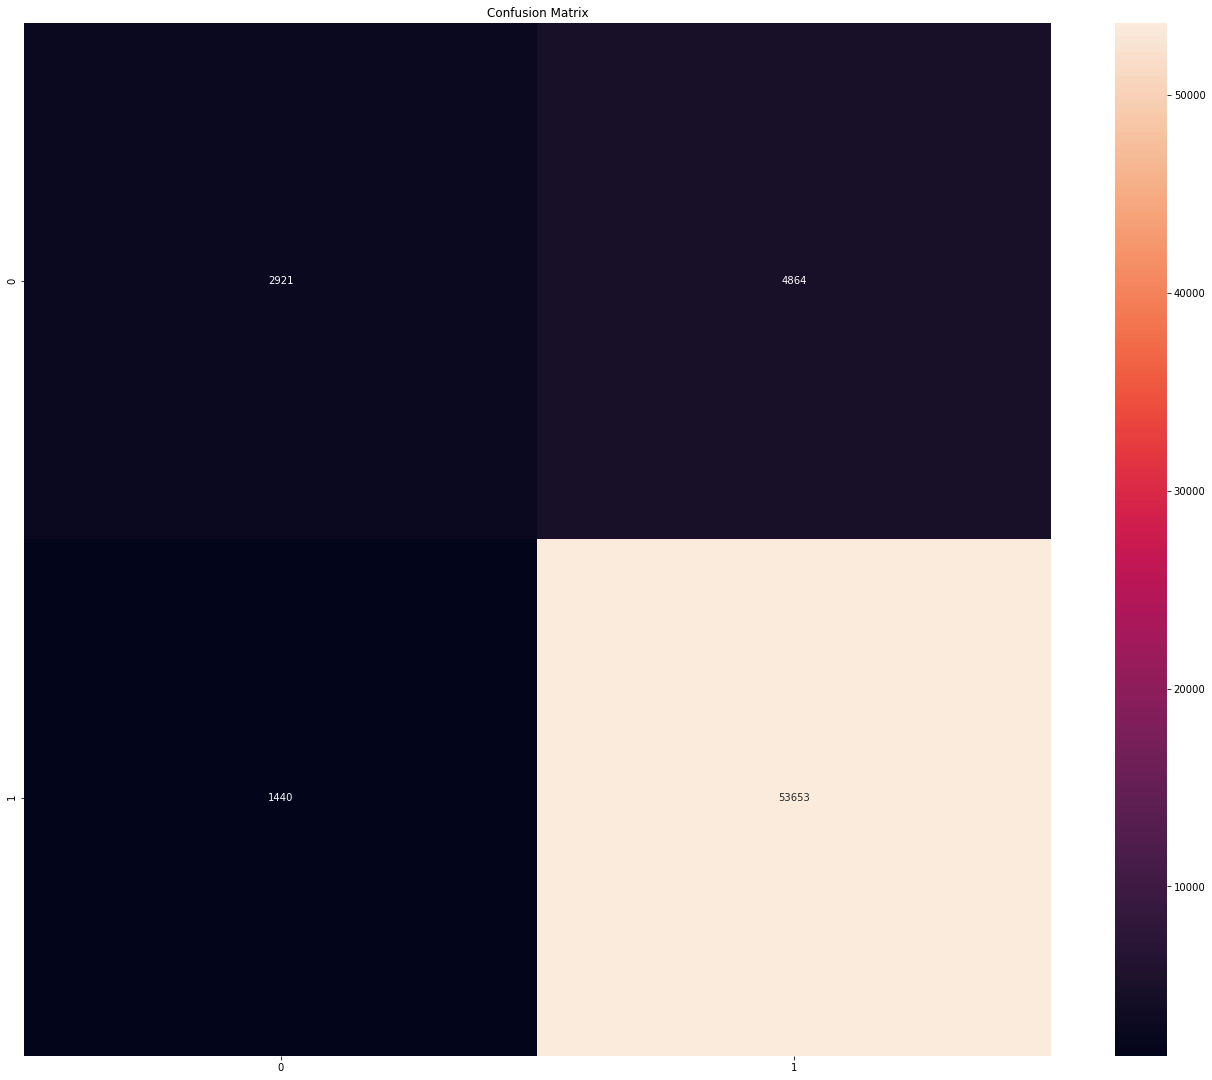

In [175]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
pyplot.title('Confusion Matrix')
pyplot.show()

In [176]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.38      0.48      7785
           1       0.92      0.97      0.94     55093

    accuracy                           0.90     62878
   macro avg       0.79      0.67      0.71     62878
weighted avg       0.89      0.90      0.89     62878



In [154]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.8997423582175006
Precision = 0.916878855717142
Recall = 0.9738623781605649
F1 Score = 0.94451192676701


ROC AUC = 0.8365966307149628


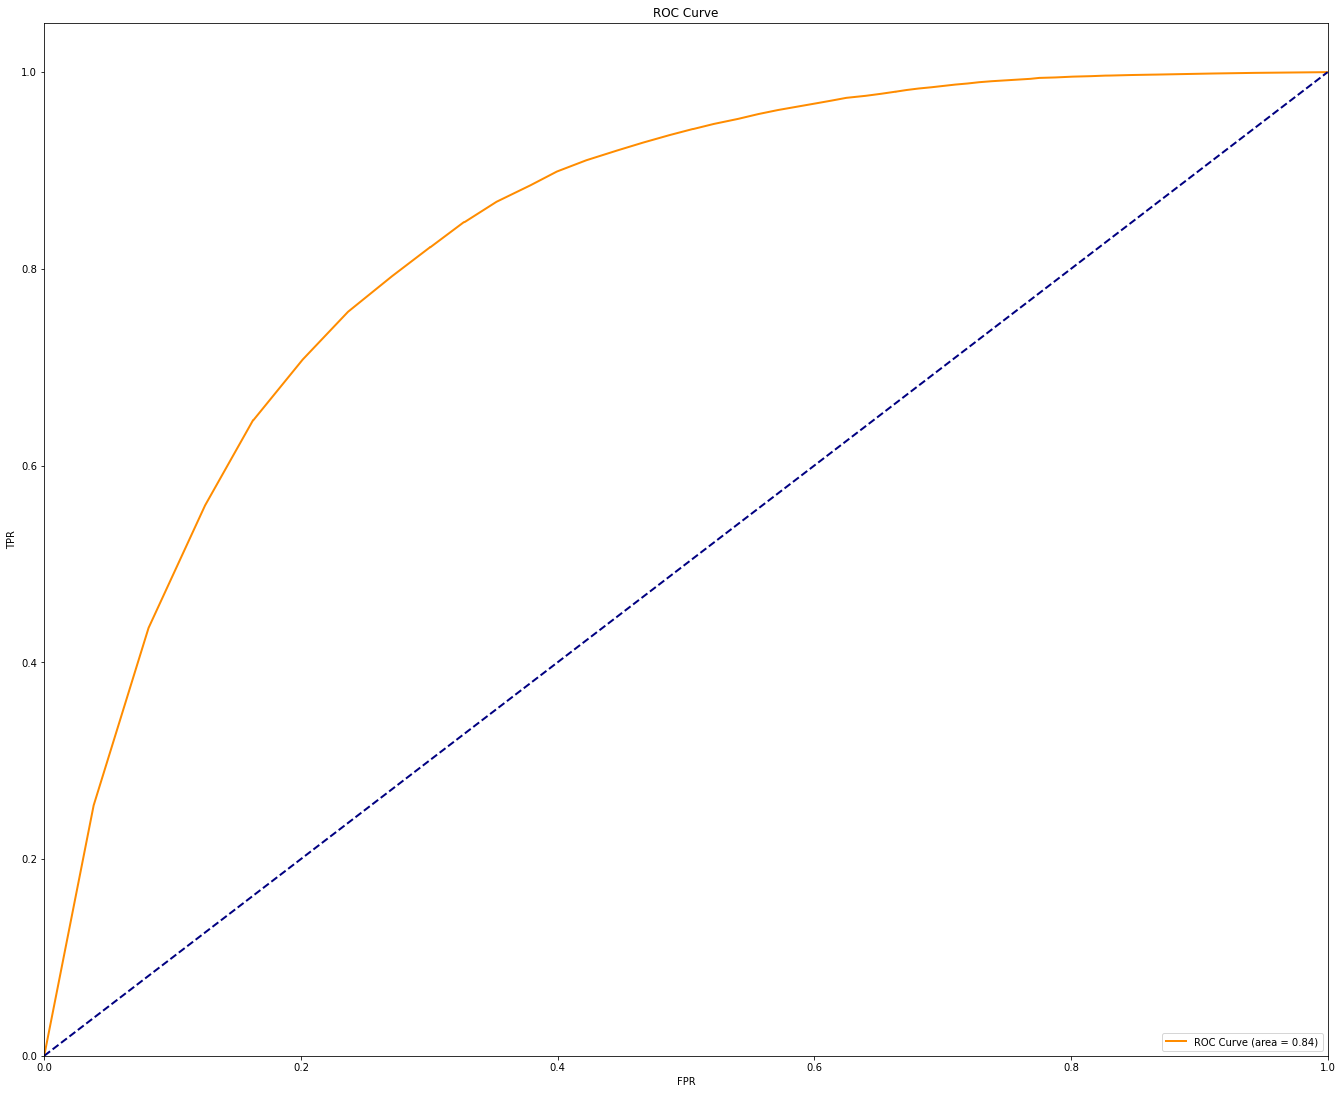

In [156]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = RF.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test,ypred[:,1])
roc_auc = roc_auc_score(y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
pyplot.figure()
lw = 2
pyplot.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
pyplot.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')
pyplot.title('ROC Curve')
pyplot.legend(loc='lower right')
pyplot.show()

# Conclusion

The random forest classifire is btter than any other models,

TP=53133
TN=3030
FP=1960 (type-1 error)
FN=4755 (type-2 error)

From the above results we can say that only 10% of data are under type 1 and the rest is on type 2 and whcih is why our model is unable to infer(52% f1score) that weather the coustomer is a deafualter or not.